# 2차원 데이터의 정리

## 두데이터 사이의 관계를 나타내는 지표

In [1]:
import numpy as np
import pandas as pd


In [2]:
%precision 3

pd.set_option('display.float_format','{:,.3f}'.format)

In [3]:
df=pd.read_csv("scores_em.csv",index_col="student number")




In [6]:
en_scores=np.array(df['english'])[:10]
ma_scores=np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame(
    {'english': en_scores, 'mathematics': ma_scores},
    index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student')
)

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 공분산

### 📌 공분산(Covariance)이란?

**공분산은 두 데이터가 _함께 어떻게 움직이는지_를 숫자로 나타낸 값**이에요.
쉽게 말해, **A가 변할 때 B도 같이 변하느냐?**를 보는 지표입니다.

---

## ✅ 한 줄 요약

> **공분산 = 두 변수의 ‘같이 움직이는 방향’을 알려주는 값**

---

## 🔍 공분산이 알려주는 것

| 공분산 값      | 의미                      |
| ---------- | ----------------------- |
| **양수(+)**  | A가 커지면 B도 **같이 커지는 경향** |
| **음수(−)**  | A가 커지면 B는 **작아지는 경향**   |
| **0에 가까움** | 둘 사이에 **뚜렷한 관계가 없음**    |

---

## 🍎 쉬운 예시로 보면

### 예시 1: 공부 시간 & 시험 점수

* 공부 시간 ↑ → 점수 ↑
  👉 **같이 증가** → 공분산 **양수**

### 예시 2: 기온 & 난방비

* 기온 ↑ → 난방비 ↓
  👉 **반대로 움직임** → 공분산 **음수**

### 예시 3: 신발 사이즈 & 시험 점수

* 서로 상관 거의 없음
  👉 공분산 **0에 가까움**

---

## 👀 그림으로 보면 더 쉬워요

![Image](https://bookdown.org/machar1991/ITER/ITER_files/figure-html/unnamed-chunk-127-1.png)

![Image](https://miro.medium.com/v2/resize%3Afit%3A1400/1%2AS0eywPhsOOLcvPIOrhz6_A.jpeg)

![Image](https://bookdown.org/machar1991/ITER/ITER_files/figure-html/unnamed-chunk-129-1.png)

* 왼쪽: 점들이 ↗ 방향 → **양의 공분산**
* 가운데: 점들이 ↘ 방향 → **음의 공분산**
* 오른쪽: 점들이 제각각 → **공분산 ≈ 0**

---

## ⚠️ 중요한 포인트 (시험·분석에서 자주 헷갈림)

* 공분산은 **단위에 영향을 받아서 크기 비교가 어려워요**
* 그래서 실제 분석에서는
  👉 **공분산을 표준화한 값 = 상관계수**를 더 많이 씁니다

---

## 🔁 정리하면

* 공분산은 **방향**을 본다 (같이 ↑ / 반대로 ↑↓)
* **크기 자체는 해석이 어렵다**
* 그래서 보통 **상관계수로 한 번 더 정리**한다

원하면 다음으로
👉 *공분산 계산식*,
👉 *상관계수랑 정확한 차이*,
👉 *파이썬 코드로 계산*
중에서 바로 이어서 설명해줄게요 😊


In [7]:
summary_df=scores_df.copy()

summary_df['english_deviation']=\
    summary_df['english']-summary_df['english'].mean()
summary_df['mathematics_deviation']=\
    summary_df['mathematics']-summary_df['mathematics'].mean()

summary_df['product of deviations']=\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df


,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [8]:
summary_df['product of deviations'].mean()

62.800

In [9]:
cov_mat=np.cov(en_scores,ma_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

좋은 질문이야 👍
이 숫자 덩어리는 **공분산 행렬**이야.
천천히, **초등학생도 이해할 수 있게** 풀어볼게 😊

---

## 🔢 이게 뭐냐면…

```python
array([[86.  , 62.8 ],
       [62.8 , 68.44]])
```

👉 이건 **2×2 표**야
👉 영어 점수와 수학 점수를 가지고 만든 **관계 요약표**야

---

## 🧩 표를 이렇게 읽으면 돼

| 위치            | 의미                    |
| ------------- | --------------------- |
| (0,0) = 86.0  | **영어 점수 혼자서의 퍼짐 정도**  |
| (1,1) = 68.44 | **수학 점수 혼자서의 퍼짐 정도**  |
| (0,1) = 62.8  | **영어와 수학의 관계**        |
| (1,0) = 62.8  | **수학과 영어의 관계 (같은 값)** |

---

## 🎯 하나씩 아주 쉽게 설명

### ① `86.0` (왼쪽 위)

👉 **영어 점수들이 평균에서 얼마나 들쭉날쭉한지**

* 숫자가 클수록 → 점수 차이가 큼
* 작을수록 → 점수들이 비슷함

📌 영어 점수는 **꽤 차이가 있음**

---

### ② `68.44` (오른쪽 아래)

👉 **수학 점수들이 평균에서 얼마나 들쭉날쭉한지**

📌 수학도 차이는 있지만
👉 영어보다는 **조금 덜 흔들림**

---

### ③ `62.8` (오른쪽 위 & 왼쪽 아래) ⭐ 중요

👉 **영어랑 수학이 얼마나 같이 움직이냐**

* 값이 **양수(+)** → 같이 오름 / 같이 내려감
* 값이 **0에 가까움** → 별로 상관 없음
* 값이 **음수(-)** → 하나 오르면 하나 내려감

📌 **62.8은 꽤 큰 양수**

👉 **영어 잘하는 학생은 수학도 잘하는 편**
👉 **영어 못하면 수학도 못하는 편**

---

## 🧠 한 문장으로 정리하면

> 이 표는
> **영어 점수는 86만큼 퍼져 있고,
> 수학 점수는 68.44만큼 퍼져 있으며,
> 영어와 수학은 62.8만큼 함께 움직인다**
> 라는 뜻이야.

---

## 🧸 초등학생 비유로 한 번 더!

🎒 영어랑 수학을 **두 친구**라고 생각해봐

* 영어가 웃으면 😊
* 수학도 같이 웃는 경우가 많음 😄

👉 그래서 **62.8이라는 큰 숫자**가 나온 거야!

---

## 🔜 다음으로 알면 딱 좋은 것

원하면 이어서:
1️⃣ 왜 공분산 숫자는 해석이 어려운지
2️⃣ 그래서 사람들이 **상관계수**를 쓰는 이유
3️⃣ `62.8`을 **-1 ~ 1 사이 숫자**로 바꾸는 방법

중에서 골라줘 😄


좋아 👍
이번 코드는 **“영어 점수랑 수학 점수가 같이 오르내리는지”**를 알아보는 준비 과정이야.
**초등학생 눈높이**로, 한 줄씩 아주 쉽게 설명해줄게 😊

---

## 🧾 1️⃣ 표를 하나 더 복사해요

```python
summary_df = scores_df.copy()
```

👉 **scores_df라는 성적표를 그대로 하나 더 복사**했어요.
왜?

* 원본 성적표는 그대로 두고
* 계산용 표를 따로 만들려고!

📋
`scores_df` 👉 원래 성적표
`summary_df` 👉 계산 연습용 성적표

---

## 📏 2️⃣ 영어 점수가 평균보다 얼마나 다른지 계산

```python
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['english'].mean()
```

👉 이건 **“영어 점수가 평균에서 얼마나 떨어져 있나?”**를 계산해요.

예시 👇

* 영어 평균 = 70점
* 어떤 학생 영어 점수 = 80점

👉 80 − 70 = **+10**
(평균보다 10점 높음)

👉 60점이면?
👉 60 − 70 = **−10**
(평균보다 10점 낮음)

📌 이걸 **편차(Deviation)** 라고 불러요.

---

## 📐 3️⃣ 수학도 똑같이 계산해요

```python
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()
```

👉 수학 점수도

* 평균보다 높으면 **+**
* 평균보다 낮으면 **−**

---

## ✖️ 4️⃣ 영어 편차 × 수학 편차

```python
summary_df['product of deviations'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
```

👉 이제 중요한 단계야!

### 왜 곱할까? 🤔

| 영어        | 수학                    | 결과                    |
| --------- | --------------------- | --------------------- |
| 평균보다 ↑    | 평균보다 ↑                | **플러스 × 플러스 = 플러스**   |
| 평균보다 ↓    | 평균보다 ↓                | **마이너스 × 마이너스 = 플러스** |
| 하나 ↑ 하나 ↓ | **플러스 × 마이너스 = 마이너스** |                       |

📌 즉,

* 영어랑 수학이 **같이 잘하거나 같이 못하면 → +**
* 하나만 잘하면 → **−**

👉 **둘이 사이좋게 움직이는지** 보는 거야!

---

## 👀 5️⃣ 계산된 표를 보여줘요

```python
summary_df
```

👉 이제 표에는

* 영어 점수
* 수학 점수
* 각각의 평균과의 차이
* 둘의 곱

이 전부 들어있어!

---

## 📊 6️⃣ 곱한 값들의 평균을 구해요

```python
summary_df['product of deviations'].mean()
```

👉 이건 한마디로 말하면:

> **영어랑 수학이 얼마나 함께 움직이는지 숫자로 나타낸 것**

* 값이 **크면** 👉 같이 잘 움직임
* 0에 가까우면 👉 별로 관계 없음
* 음수면 👉 반대로 움직임

📌 이게 바로 **공분산(covariance)** 의 핵심 생각이야!

---

## 🧮 7️⃣ 파이썬에게 “공분산 직접 계산해줘!”

```python
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat
```

👉 우리가 위에서 한 계산을
👉 **numpy라는 똑똑한 계산기가 한 번에 해주는 것**

### 결과는 이렇게 나와요 👇

```
[[영어-영어 공분산   영어-수학 공분산]
 [수학-영어 공분산   수학-수학 공분산]]
```

* 가운데 값 👉 **영어 ↔ 수학 공분산**
* 우리가 손으로 계산한 값이랑 거의 같아!

---

## 🎯 한 줄 요약 (초등학생 버전)

> 이 코드는
> **영어 점수랑 수학 점수가 같이 높아지거나 같이 낮아지는지**
> 알아보는 코드야 😊

원하면 다음 단계로
👉 **공분산이 왜 음수/양수인지**
👉 **상관계수랑 뭐가 다른지**
👉 **그림으로 설명**
도 해줄게!


In [10]:
cov_mat[0,1],cov_mat[1,0]

(62.800, 62.800)

In [11]:
cov_mat[0,0],cov_mat[1,1]

(86.000, 68.440)

In [12]:
np.var(en_scores,ddof=0),np.var(ma_scores,ddof=0)

(86.000, 68.440)

## 상관계수

In [15]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))


0.819

In [16]:
np.corrcoef(en_scores,ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [17]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


# 2차원 데이터의 시각화

## 산점도

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

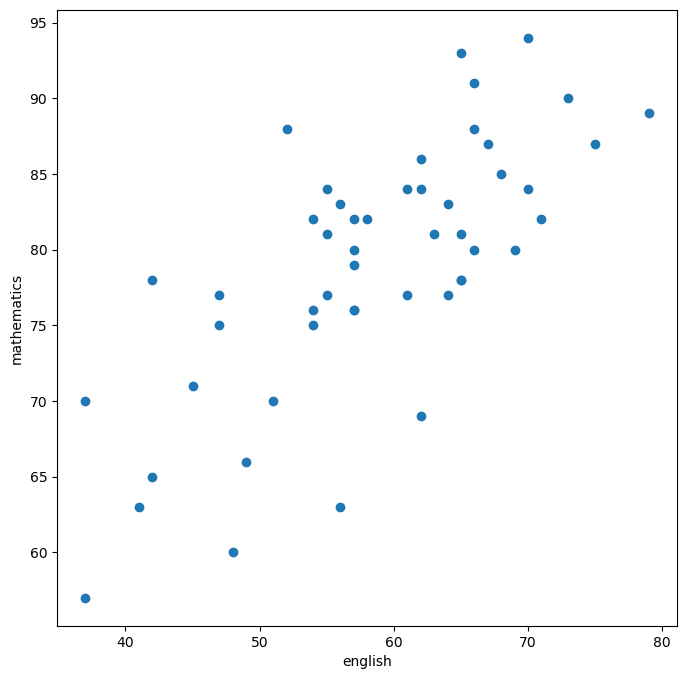

In [19]:
english_scores=np.array(df['english'])
math_scores=np.array(df['mathematics'])

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

ax.scatter(english_scores,math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

## 회귀직선

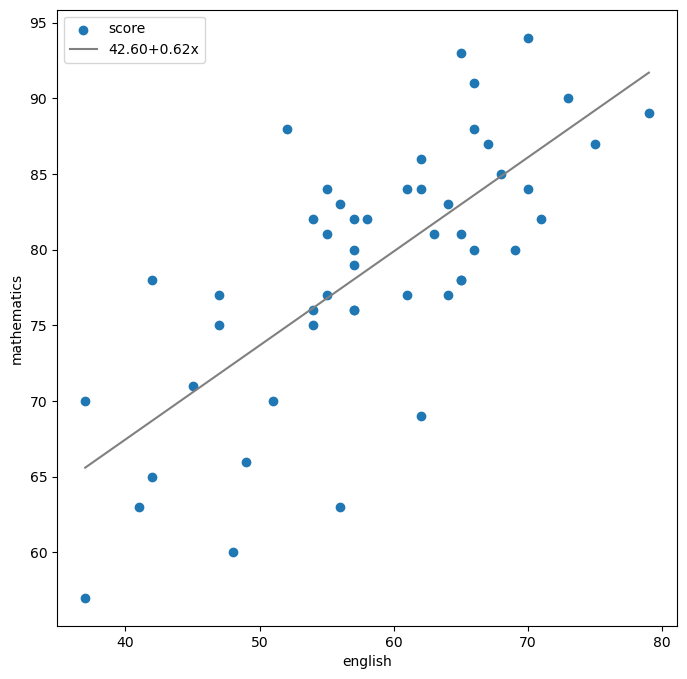

In [20]:
poly_fit=np.polyfit(english_scores,math_scores,1)


poly_1d=np.poly1d(poly_fit)

xs=np.linspace(english_scores.min(),english_scores.max())

ys=poly_1d(xs)

fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel("mathematics")
ax.scatter(english_scores,math_scores,label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.legend(loc='upper left')
plt.show()